### Febrero 2019
#### Versión 01

## Transformada de Fourier Discreta

La Transformada de Fourier Discreta (DFT, por sus siglas en inglés) se define como el producto interno (también conocido como producto punto) entre la señal y el vector base de Fourier (Prandoni y Vetterli, 2008),

$$
\mathbf{X[k] = \langle w^{(k)}, x \rangle  = \sum_{n = 0}^{N-1} x[n] e^{-i \frac{2\pi}{N} nk}, 
                                                                                     \quad k= 0,\ldots, N-1 }, 
                                                                                     \qquad \text Ec.1                                                                                  
$$

Donde:

   * $\mathbf{X[k]}$ = Transformada discreta de Fourier
   * $\mathbf{x[n]}$ = señal
   * $\mathbf{N}$ = número de muestras
   * $\mathbf{k}$ = frecuencia circular (0 [Hz] a N-1 [Hz])
   
Dada una señal $\mathbf{x[n]}$, el espectro de amplitud esta dado por

$$
\mathbf{\big|X[k]\big|}, \qquad \text Ec.1a
$$ 

y el espectro de fase por 

$$
\measuredangle \mathbf{X[k]}, \qquad \text Ec.1b
$$ 

envuelta en el intervalo $[- \pi, \pi]$. 

### Onda sinusoidad

Sea una onda sinusoidad 1D, defina como (Robinson y Treitel, 2008)
$$
u(x,t) = A \cos (\mathit{k}x\pm\omega t), \qquad \text Ec. 2
$$

donde:

   * $\mathit{k} = \mathbf{\frac{2\pi}{\lambda}}$, número de onda o propagación
   * $\mathbf{\omega} = 2\pi f$, frecuencia angular
  
Caso 1. Onda sinusoidad en función del tiempo para $x = 0$, 
$$
\left.u(x,t) \right|_{x=0} = u(t) = A \cos(\pm \omega t) = A \cos(\pm 2\pi f t),  \qquad \text Ec. 2a
$$
Caso 2. Onda sinusoidad en función del espacio para $t = 0$, 
$$
\left.u(x,t) \right|_{t=0} = u(x) = A \cos(\mathit{k}x) = A \cos \left(\frac{2\pi}{\lambda} x \right),  \qquad \text Ec. 2b
$$

La frecuencia temporal y espacial de muestreo máxima, está dada por,
$$
f_{nyquist}(t) = \frac{1}{2 \Delta t}, \quad f_{nyquist}(x) = \frac{1}{2 \Delta t}.  \qquad \text Ec. 3
$$

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import signal

In [2]:
def DFT(x):
    'DFT a partir del producto interno'
    N = x.size
    n = np.arange(N)
    k = n.reshape((N,1))
    e = np.exp(-2j*np.pi*k*n/N)
    return np.dot(e,x)

In [3]:
############################
#Caso 1:función temporal
############################
dt = 0.001
t = np.arange(0, 10, dt)
nt = t.size
f = 8
############################
#Frecuencua de Nyquist
############################
fn = 1/(2*dt)

In [4]:
print('Frecuencia Nyquist =', fn, '[Hz]')
print ('Frecuencia circular =', f, '[Hz]')
print ('Intervalo de muestreo =',dt, '[s]')

Frecuencia Nyquist = 500.0 [Hz]
Frecuencia circular = 8 [Hz]
Intervalo de muestreo = 0.001 [s]


In [ ]:
#Señal
sx = np.cos(-2*3.1416*f*t)
#DFT de la señal
sX = DFT(sx)

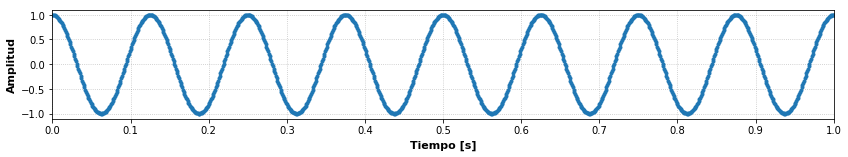

In [ ]:
plt.figure(figsize=(14,2))
_ = plt.plot(t,sx, '.')
_ = plt.xlim(0,1)
_ = plt.xticks(np.arange(0,1.1,0.1))
_ = plt.xlabel('Tiempo [s]', fontsize = 11, weight = 'semibold')
_ = plt.ylabel('Amplitud', fontsize = 11, weight = 'semibold')
_ = plt.grid(True, alpha = 0.5, color = 'grey', linestyle = ':')

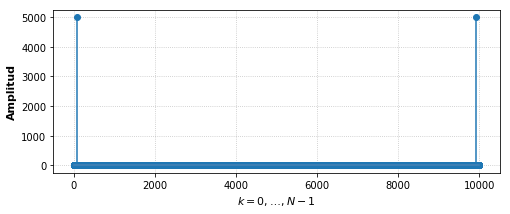

In [ ]:
plt.figure(figsize=(8,3)) 

_ = plt.stem(abs(sX), basefmt = 'steelblue')
_ = plt.xlabel('$k= 0,\ldots, N-1$', fontsize = 11, weight = 'semibold')
_ = plt.ylabel('Amplitud', fontsize = 11, weight = 'semibold')
_ = plt.grid(True, alpha = 0.5, color = 'grey', linestyle = ':')

In [ ]:
def dft_shift(X):
    N = len(X)
    if (N % 2 ==0):
        return np.arange(-N/2, N/2 + 1), np.concatenate((X[int(N/2):], X[:int(N/2)+1]))
    else:
        return np.arange(-N(N-1)/2, (N-1)/2 + 1), np.concatenate((X[(int((N+1)/2))]))

In [ ]:
plt.figure(figsize=(8,3))

kn, y = dft_shift(sX)
_ = plt.stem(kn, abs(y), basefmt = 'steelblue')
_ = plt.xlabel('Frecuencia índice $[k]$', fontsize = 11, weight = 'semibold')
_ = plt.ylabel('Amplitud', fontsize = 11, weight = 'semibold')
_ = plt.grid(True, alpha = 0.5, color = 'grey', linestyle = ':')

In [ ]:
hz = np.linspace(-fn,fn,kn.size)

In [ ]:
plt.figure(figsize=(8,3)) 

_ = plt.stem(hz, abs(y),  basefmt = 'steelblue')
_ = plt.xlim(0,20)
_ = plt.xticks(np.arange(21))
_ = plt.xlabel('Frecuencia Hz]', fontsize = 11, weight = 'semibold', color = 'k')
_ = plt.ylabel('Amplitud', fontsize = 11, weight = 'semibold', color = 'k')
_ = plt.title('Espectro de amplitud', fontsize = 16, weight = 'semibold')
_ = plt.grid(True, alpha = 0.5, color = 'grey', linestyle = ':')

### b) Usando la biblioteca numpy.fft
Para ver documentación, consultar `help(np.fft)`.

#### Caso 2: función espacial
* $x_{1, \ldots, n}$: serie de espacio n-enésima
* $dx_{1, \ldots, n}$: intervalo de muestreo espacial n-enésimo
* $nx_{1, \ldots, n}$: longitud temporal n-enésimo
* $lw_{1, \ldots, n}$: longitud de onda

In [ ]:
############################
#Caso 1:función temporal
############################
dt = 0.001
t = np.arange(0, 10, dt)
nt = t.size
f = 8
############################
#Dominio espacial
############################
dx = 0.001
x = np.arange(0, 10, dx)
nx = x.size
v = 2
lw = v/f
############################
#Frecuencua de Nyquist
############################
fnt1 = 1/(2*dt)
fnx2 = 1/(2*dx)

In [ ]:
print('Frecuencia Nyquist temporal =', fnt1, '[Hz]')
print('Frecuencia Nyquist espacial =', fnx2, '[1/m]')
print ('Frecuencia circular =', f, '[Hz]')
print ('Longitud de onda =',lw, '[m]')
print ('Velocidad de fase =',v, '[m/s]')

In [ ]:
signalt = np.cos(-2*3.1416*f*t)
signalx = np.cos((2*3.1416/lw)*x)

In [ ]:
plt.figure(figsize=(14,6))

plt.subplot(2,1,1)
_ = plt.plot(t,signalt, 'b.', markersize = 6)
_ = plt.plot(t,signalt, '--b', lw = 1.2)
_ = plt.xlim(0,4)
_ = plt.ylim(-1.2,1.2)
_ = plt.xticks(np.arange(5), [''])
_ = plt.xlabel('Tiempo [s]', fontsize = 11, weight = 'semibold', color= 'k')
_ = plt.ylabel('Amplitud', fontsize = 11, weight = 'semibold', color = 'k')
_ = plt.grid(True, alpha = 0.5, color = 'grey', linestyle = ':')
_ = plt.title('Onda sinusoidal', fontsize = 16, weight = 'semibold')

plt.subplot(2,1,2)
_ = plt.plot(x,signalx, '.r', markersize = 6)
_ = plt.plot(x,signalx, '--r', lw = 1.2)
_ = plt.xlim(0,4)
_ = plt.ylim(-1.2,1.2)
_ = plt.xticks(np.arange(5))
_ = plt.xlabel('Distancia [s]', fontsize = 11, weight = 'semibold', color = 'k')
_ = plt.ylabel('Amplitud', fontsize = 11, weight = 'semibold', color = 'k')
_ = plt.grid(True, alpha = 0.5, color = 'grey', linestyle = ':')

In [ ]:
#Transformada de Fourier-Espectro de amplitud
St = np.abs(np.fft.rfft(signalt))
freq1 = np.fft.rfftfreq(nt, d = dt)
Sx = np.abs(np.fft.rfft(signalx))
freq2 = np.fft.rfftfreq(nx, d = dx)
#Espectro de fase
Stf = np.angle(np.fft.rfft(signalt), deg = False)
Sxf = np.angle(np.fft.rfft(signalx), deg = False)

In [ ]:
plt.figure(figsize=(8,6)) 

plt.subplot(2,1,1)
_ = plt.stem(freq1, St, markerfmt = 'bo', linefmt = 'b', basefmt = 'b')
_ = plt.xlim(0,20)
_ = plt.xticks(np.arange(21), [''])
_ = plt.xlabel('Frecuencia temporal [Hz]', fontsize = 11, weight = 'semibold', color = 'k')
_ = plt.ylabel('Amplitud', fontsize = 11, weight = 'semibold', color = 'k')
_ = plt.title('Espectro de amplitud', fontsize = 16, weight = 'semibold')

plt.subplot(2,1,2)
_ = plt.stem(freq2, Sx, markerfmt = 'ro', linefmt = 'r', basefmt = 'r')
_ = plt.xlim(0,20)
_ = plt.xticks(np.arange(21))
_ = plt.xlabel('Frecuencia espacial [1/m]', fontsize = 11, weight = 'semibold', color = 'k')
_ = plt.ylabel('Amplitud', fontsize = 11, weight = 'semibold', color = 'k')


In [ ]:
plt.figure(figsize=(8,6)) 

plt.subplot(2,1,1)
_ = plt.plot(freq1, Stf,  'ob', markersize = 3, lw = 0.5)
_ = plt.xlim(0,20)
_ = plt.ylim(-3.5,3.5)
_ = plt.xticks(np.arange(21), [''])
_ = plt.xlabel('Frecuencia temporal [Hz]', fontsize = 11, weight = 'semibold', color = 'k')
_ = plt.ylabel('Fase [rad]', fontsize = 11, weight = 'semibold', color = 'k')
_ = plt.title('Espectro de fase', fontsize = 16, weight = 'semibold')
_ = plt.grid(True, alpha = 0.5, color = 'grey', linestyle = ':')
#_ = plt.legend(loc = 'upper right')

plt.subplot(2,1,2)
_ = plt.plot(freq2, Sxf,  'or', markersize = 3, lw = 0.5)
_ = plt.xlim(0,20)
_ = plt.xticks(np.arange(21))
_ = plt.ylim(-3.5,3.5)
_ = plt.xlabel('Frecuencia espacial [1/m]', fontsize = 11, weight = 'semibold', color = 'k')
_ = plt.ylabel('Fase', fontsize = 11, weight = 'semibold', color = 'k')
_ = plt.grid(True, alpha = 0.5, color = 'grey', linestyle = ':')
#_ = plt.legend(loc = 'upper right')

## DFT con múltiples ondas sinusoidales sin y con ruido aleatorio

In [ ]:
#Parámetros
dt = 0.001
t = np.arange(0, 10, dt)
pi = 3.1416
n = t.size
f = [3,1,7,12,18]
a = [10,2,5,8,3]
p = [0, pi/4, -pi, pi/2, pi]

In [ ]:
#Función sin ruido
swave = np.zeros(n)
for m in np.arange(0, 5):
    swave = swave + a[m]*np.sin(2*pi*f[m]*t+p[m])

In [ ]:
#Función con ruido
swaveN = swave + np.random.randn(n)*20

In [ ]:
plt.figure(figsize=(14,6))

plt.subplot(2,1,1)
_ = plt.plot(t, swave, 'k', label = 'Sin ruido')
_ = plt.xlim(0,6)
_ = plt.ylim(-90,90)
_ = plt.xticks(np.arange(7), [''])
_ = plt.ylabel('Amplitud', fontsize = 11, weight = 'semibold', color= 'k')
_ = plt.grid(True, alpha = 0.5, color = 'grey', linestyle = ':')
_ = plt.title('Ondas sinusoidales', fontsize = 16, weight = 'semibold')
_ = plt.legend(loc = 'upper right')

plt.subplot(2,1,2)
_ = plt.plot(t, swaveN, label = 'Con ruido')
_ = plt.xlim(0,6)
_ = plt.ylim(-90,90)
_ = plt.xticks(np.arange(7))
_ = plt.xlabel('Tiempo [s]', fontsize = 11, weight = 'semibold', color= 'k')
_ = plt.ylabel('Amplitud', fontsize = 11, weight = 'semibold', color= 'k')
_ = plt.grid(True, alpha = 0.5, color = 'grey', linestyle = ':')
_ = plt.legend(loc = 'upper right')

In [ ]:
#Transformada de Fourier-Espectro de amplitud
sW = np.abs(np.fft.rfft(swave))
sWN = np.abs(np.fft.rfft(swaveN))
f = np.fft.rfftfreq(n, d = dt)
#Espectro de fase
sF = np.angle(np.fft.rfft(swave))
sFN = np.angle(np.fft.rfft(swaveN))

In [ ]:
plt.figure(figsize=(8,6)) 

plt.subplot(2,1,1)
_ = plt.stem(f, sW, markerfmt = 'ko', linefmt = 'k', basefmt = 'k', label = 'Sin ruido')
_ = plt.xlim(0,20)
_ = plt.xticks(np.arange(21), [''])
_ = plt.ylabel('Amplitud', fontsize = 11, weight = 'semibold', color = 'k')
_ = plt.title('Espectro de amplitud', fontsize = 16, weight = 'semibold')
_ = plt.grid(True, alpha = 0.5, color = 'grey', linestyle = ':')
_ = plt.legend(loc = 'upper right')

plt.subplot(2,1,2)
_ = plt.stem(f, sWN, linefmt = 'steelblue', basefmt = 'steelblue', label = 'Con ruido')
_ = plt.xlim(0,20)
_ = plt.xticks(np.arange(21))
_ = plt.xlabel('Frecuencia [Hz]', fontsize = 11, weight = 'semibold', color = 'k')
_ = plt.ylabel('Amplitud', fontsize = 11, weight = 'semibold', color = 'k')
_ = plt.grid(True, alpha = 0.5, color = 'grey', linestyle = ':')
_ = plt.legend(loc = 'upper right')

In [ ]:
plt.figure(figsize=(8,6)) 

plt.subplot(2,1,1)
_ = plt.plot(f, sF, '.r', label = 'Sin ruido')
_ = plt.xlim(0,20)
_ = plt.ylim(-pi*1.5,pi*1.5)
_ = plt.xticks(np.arange(21), [''])
_ = plt.ylabel('Fase [rad]', fontsize = 11, weight = 'semibold', color = 'k')
_ = plt.title('Espectro de fase', fontsize = 16, weight = 'semibold')
_ = plt.grid(True, alpha = 0.5, color = 'grey', linestyle = ':')
_ = plt.legend(loc = 'upper right')

plt.subplot(2,1,2)
_ = plt.plot(f, sFN,'.--', label = 'Con ruido')
_ = plt.xlim(0,20)
_ = plt.ylim(-pi*1.5,pi*1.5)
_ = plt.xticks(np.arange(21))
_ = plt.xlabel('Frecuencia [Hz]', fontsize = 11, weight = 'semibold', color = 'k')
_ = plt.ylabel('Fase [rad]', fontsize = 11, weight = 'semibold', color = 'k')
_ = plt.grid(True, alpha = 0.5, color = 'grey', linestyle = ':')
_ = plt.legend(loc = 'upper right')

## DFT de una traza sísmica en el dominio del tiempo y espacio

In [ ]:
sism_z = pd.read_csv('well_l30.csv')
sism_t = pd.read_csv('seismic_amplitude_time.csv')
pot_od = pd.read_csv('pot_seismic_amplitude_time.csv') #Espectro de amplitud calculado con OpendTect
potdb_od = pd.read_csv('potdb_seismic_amplitude_time.csv')
print('Dominio profundidad:', sism_z.columns)
print('Dominio tiempo:', sism_t.columns)
print('Potencia OD:', pot_od.columns)
print('Potencia OD:', potdb_od.columns)

In [ ]:
plt.figure(figsize=(14,7.5))

plt.subplot(2,1,1)
_ = plt.plot(sism_z['depth'],sism_z['amplitud'], 'b')
_ = plt.xlim(0,4350)
_ = plt.xticks(np.arange(0,4350,250))
_ = plt.xlabel('Profundidad [m]', fontsize = 11, weight = 'semibold')
_ = plt.ylabel('Amplitud', fontsize = 11, weight = 'semibold')
_ = plt.title('Traza sísmica', fontsize = 16, weight = 'semibold')
_ = plt.grid(True, alpha = 0.5, color = 'grey', linestyle = ':')


plt.subplot(2,1,2)
_ = plt.plot(sism_t['time'],sism_t['seis_amp'], 'b')
_ = plt.xlim(0,6)
_ = plt.xticks(np.arange(0,6.025,0.25))
_ = plt.xlabel('Tiempo [s]', fontsize = 11, weight = 'semibold')
_ = plt.ylabel('Amplitud', fontsize = 11, weight = 'semibold')
_ = plt.grid(True, alpha = 0.5, color = 'grey', linestyle = ':')


In [ ]:
#Transformada de Fourier espacial
sismX = np.abs(np.fft.rfft(sism_z['amplitud']))
fX = np.fft.rfftfreq(sism_z['amplitud'].size, d = 0.15)
#Transformada inversa de Fourier espacial
isismX = np.fft.irfft(np.fft.rfft(sism_z['amplitud']))

In [ ]:
#Transformada de Fourier temporal
sismT = np.abs(np.fft.rfft(sism_t['seis_amp']))
fT = np.fft.rfftfreq(sism_t['time'].size, d = 0.004)
#Transformada inversa de Fourier temporal
isismT =np.fft.irfft(np.fft.rfft(sism_t['seis_amp']))
#Espectro de fase
sismFt = np.angle(np.fft.rfft(sism_t['seis_amp']))
sismFx = np.angle(np.fft.rfft(sism_z['amplitud']))

In [ ]:
plt.figure(figsize=(8,8)) 

plt.subplot(2,1,1)
_ = plt.stem(fX, sismX, markerfmt = 'k', linefmt = 'k', basefmt = 'k')
_ = plt.xlim(0,0.1)
_ = plt.xticks(np.arange(0, 0.11, 0.01))
_ = plt.ylabel('Amplitud', fontsize = 11, weight = 'semibold', color = 'k')
_ = plt.title('Espectro de amplitud', fontsize = 16, weight = 'semibold')
_ = plt.xlabel('Número de onda [1/m]', fontsize = 11, weight = 'semibold', color = 'k')
_ = plt.grid(True, alpha = 0.5, color = 'grey', linestyle = ':')

plt.subplot(2,1,2)
_ = plt.stem(fT, sismT, markerfmt = 'k', linefmt = 'k', basefmt = 'k')
_ = plt.xlim(0,120)
_ = plt.xticks(np.arange(0,130,10))
_ = plt.xlabel('Frecuencia [Hz]', fontsize = 11, weight = 'semibold', color = 'k')
_ = plt.ylabel('Amplitud', fontsize = 11, weight = 'semibold', color = 'k')
_ = plt.grid(True, alpha = 0.5, color = 'grey', linestyle = ':')

In [ ]:
plt.figure(figsize=(8,5)) 

_ = plt.stem(pot_od['freq'], pot_od['pot'], markerfmt = 'green', linefmt = 'green', basefmt = 'green',
             label = 'FFT con OpendTect')
_ = plt.stem(fT, sismT, markerfmt = 'k', linefmt = 'k', basefmt = 'k', label = 'FFT con Numpy')
_ = plt.xlim(0,120)
_ = plt.legend()
_ = plt.xticks(np.arange(0,130,10))
_ = plt.title('Espectro de amplitud', fontsize = 16, weight = 'semibold')
_ = plt.xlabel('Frecuencia [Hz]', fontsize = 12, weight = 'semibold', color = 'k')
_ = plt.ylabel('Amplitud', fontsize = 11, weight = 'semibold', color = 'k')
_ = plt.grid(True, alpha = 0.5, color = 'grey', linestyle = ':')

In [ ]:
plt.figure(figsize=(8,5)) 


_ = plt.stem(pot_od['freq'], 20*np.log10(pot_od['pot']), markerfmt = 'green', linefmt = 'green', basefmt = 'green', 
             label = 'FFT con OpendTect')
_ = plt.stem(fT, 20*np.log10(sismT), markerfmt = 'k', linefmt = 'k', basefmt = 'k', label = 'FFT con Numpy')
_ = plt.xlim(0,120)
_ = plt.ylim(30,130)
_ = plt.xticks(np.arange(0,130,10))
_ = plt.legend()
_ = plt.title('Espectro de amplitud', fontsize = 16, weight = 'semibold')
_ = plt.xlabel('Frecuencia [Hz]', fontsize = 11, weight = 'semibold', color = 'k')
_ = plt.ylabel('Amplitud [dB]', fontsize = 11, weight = 'semibold', color = 'k')
_ = plt.grid(True, alpha = 0.5, color = 'grey', linestyle = ':')

In [ ]:
esp = signal.medfilt(sismT,5)
esp_db = signal.medfilt(20*np.log10(sismT),5)

In [ ]:
fig, ax1 = plt.subplots(figsize=(8,5))

color = 'tab:grey'
ax1.set_xlabel('Frecuencia [Hz]', fontsize = 10, weight = 'semibold')
ax1.set_ylabel('Amplitud [dB]', color = color, fontsize = 10, weight = 'semibold')
ax1.plot(fT, esp_db, color = color, lw = 2, label = 'Escala dB')
ax1.tick_params(axis='y', labelcolor=color)
ax1.legend(loc = 'upper right')
plt.ylim(25,110)
ax2 = ax1.twinx()

color = 'tab:blue'
ax2.set_ylabel('Amplitud', fontsize = 10, color = color, weight = 'semibold')
ax2.plot(fT, esp, lw = 2, label = 'Escala lineal')
ax2.tick_params(axis='y', labelcolor=color)
ax2.legend(loc = 'center right')
plt.title('Espectro de amplitud', fontsize=12, weight = 'semibold')
plt.xlim(0,125)

plt.show()

In [ ]:
plt.figure(figsize=(8,8)) 

plt.subplot(2,1,1)
_ = plt.plot(fT, sismFt,  'k', markersize = 3, lw = 0.5)
_ = plt.xlim(0,75)
_ = plt.ylim(-3.5,3.5)
_ = plt.xticks(np.arange(0,80,5))
_ = plt.xlabel('Frecuencia temporal [Hz]', fontsize = 11, weight = 'semibold', color = 'k')
_ = plt.ylabel('Fase [rad]', fontsize = 11, weight = 'semibold', color = 'k')
_ = plt.title('Espectro de fase', fontsize = 16, weight = 'semibold')
_ = plt.grid(True, alpha = 0.5, color = 'grey', linestyle = ':')
#_ = plt.legend(loc = 'upper right')

plt.subplot(2,1,2)
_ = plt.plot(fX, sismFx,  'r', markersize = 3, lw = 0.5)
_ = plt.xlim(0,0.07)
_ = plt.xticks(np.arange(0,0.08,0.01))
_ = plt.ylim(-3.5,3.5)
_ = plt.xlabel('Frecuencia espacial [1/m]', fontsize = 11, weight = 'semibold', color = 'k')
_ = plt.ylabel('Fase [rad]', fontsize = 11, weight = 'semibold', color = 'k')
_ = plt.grid(True, alpha = 0.5, color = 'grey', linestyle = ':')
#_ = plt.legend(loc = 'upper right')

In [ ]:
plt.figure(figsize=(14,7.5))

plt.subplot(2,1,1)
_ = plt.plot(sism_z['depth'][:-1], isismX, 'r')
#_ = plt.xlim(0,4350)
#_ = plt.xticks(np.arange(0,4350,250))
_ = plt.xlabel('Profundidad [m]', fontsize = 11, weight = 'semibold')
_ = plt.ylabel('Amplitud', fontsize = 11, weight = 'semibold')
_ = plt.title('Reconstrucción de la traza sísmica', fontsize = 16, weight = 'semibold')
_ = plt.grid(True, alpha = 0.5, color = 'grey', linestyle = ':')


plt.subplot(2,1,2)
_ = plt.plot(sism_t['time'][:-1], isismT, 'r')
#_ = plt.xlim(0,6)
#_ = plt.xticks(np.arange(0,6.025,0.25))
_ = plt.xlabel('Tiempo [s]', fontsize = 11, weight = 'semibold')
_ = plt.ylabel('Amplitud', fontsize = 11, weight = 'semibold')
_ = plt.grid(True, alpha = 0.5, color = 'grey', linestyle = ':')

### Referencias:

* Prandoni, P., y M. Vetterli, 2008, _Signal Processing for Communications_: EPFL Press.
* Robinson, E. A., y S. Treitel, 2008, _Digital Imaging and Deconvolution: The ABCs of Seismic Exploration and Processing_: SEG.